In [12]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [79]:
df = pd.read_csv("/home/server/Documents/Github/computervisie-group8/src/data/matchingscores.csv")
df

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,20190217_105927.jpg,"[""Zaal_H__20190323_120646__01.png""]",[528.0],"[""zaal_15__IMG_20190323_120122__01.png""]",[1027.0],[0.21238714199898823],"[""Zaal_H__20190323_120646__01.png""]",[388.0],"[""zaal_18__IMG_20190323_120814__01.png""]",...,"[""Zaal_H__20190323_120646__01.png""]",[295.0],"[""zaal_18__IMG_20190323_120814__01.png""]",[850.0],[0.5431346610002947],"[""Zaal_H__20190323_120646__01.png""]",[0.21572446823120117],"[""Zaal_E__20190323_115435__01.png""]",[0.2893564701080322],[0.963613615000213]


In [78]:
df.iloc[0].distance_50_features[0]

528.0

In [80]:
def convert_float(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float32)
    descriptors = [d[0] for d  in descriptors]
    return descriptors

def convert_object(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.object_)
    descriptors = [d[0] for d  in descriptors]
    return np.array(descriptors)

df['result_50_features'] = df['result_50_features'].apply(lambda x: convert_object(x))
df['second_result_50_features'] = df['second_result_50_features'].apply(lambda x: convert_object(x))
df['result_100_features'] = df['result_100_features'].apply(lambda x: convert_object(x))
df['second_result_100_features'] = df['second_result_100_features'].apply(lambda x: convert_object(x))
df['result_200_features'] = df['result_200_features'].apply(lambda x: convert_object(x))
df['second_result_200_features'] = df['second_result_200_features'].apply(lambda x: convert_object(x))
df['result_300_features'] = df['result_300_features'].apply(lambda x: convert_object(x))
df['second_result_300_features'] = df['second_result_300_features'].apply(lambda x: convert_object(x))
df['result_fvector'] = df['result_fvector'].apply(lambda x: convert_object(x))
df['second_result_fvector'] = df['second_result_fvector'].apply(lambda x: convert_object(x))

df['distance_50_features'] = df['distance_50_features'].apply(lambda x: convert_float(x))
df['second_distance_50_features'] = df['second_distance_50_features'].apply(lambda x: convert_float(x))
df['time_50_features'] = df['time_50_features'].apply(lambda x: convert_float(x))
df['distance_100_features'] = df['distance_100_features'].apply(lambda x: convert_float(x))
df['second_distance_100_features'] = df['second_distance_100_features'].apply(lambda x: convert_float(x))
df['time_100_features'] = df['time_100_features'].apply(lambda x: convert_float(x))
df['distance_200_features'] = df['distance_200_features'].apply(lambda x: convert_float(x))
df['second_distance_200_features'] = df['second_distance_200_features'].apply(lambda x: convert_float(x))
df['time_200_features'] = df['time_200_features'].apply(lambda x: convert_float(x))
df['distance_300_features'] = df['distance_300_features'].apply(lambda x: convert_float(x))
df['second_distance_300_features'] = df['second_distance_300_features'].apply(lambda x: convert_float(x))
df['time_300_features'] = df['time_300_features'].apply(lambda x: convert_float(x))
df['distance_fvector'] = df['distance_fvector'].apply(lambda x: convert_float(x))
df['second_distance_fvector'] = df['second_distance_fvector'].apply(lambda x: convert_float(x))
df['time_fvector'] = df['time_fvector'].apply(lambda x: convert_float(x))


In [81]:
df.head()

,Unnamed: 0,filename,result_50_features,distance_50_features,second_result_50_features,second_distance_50_features,time_50_features,result_100_features,distance_100_features,second_result_100_features,...,result_300_features,distance_300_features,second_result_300_features,second_distance_300_features,time_300_features,result_fvector,distance_fvector,second_result_fvector,second_distance_fvector,time_fvector
0,0,20190217_105927.jpg,[Zaal_H__20190323_120646__01.png],[528.0],[zaal_15__IMG_20190323_120122__01.png],[1027.0],[0.21238714],[Zaal_H__20190323_120646__01.png],[388.0],[zaal_18__IMG_20190323_120814__01.png],...,[Zaal_H__20190323_120646__01.png],[295.0],[zaal_18__IMG_20190323_120814__01.png],[850.0],[0.5431347],[Zaal_H__20190323_120646__01.png],[0.21572447],[Zaal_E__20190323_115435__01.png],[0.28935647],[0.9636136]


In [97]:
DATABASE_DIR = "/home/server/Documents/Github/computervisie-group8/data/Database/"
TEST_IMAGE_DIR = "/home/server/Documents/Github/computervisie-group8/data/Computervisie 2020 Project Database/test_pictures_msk/"


def load_image(path):
    img = tf.keras.utils.load_img(path)
    return img

    
def show_row(df,index):
    global TEST_IMAGE_DIR
    global DATABASE_DIR


    image = load_image(TEST_IMAGE_DIR + df.iloc[index].filename)
    plt.figure(figsize = (5,5))
    plt.imshow(image)
    plt.title("query")



    f, axarr = plt.subplots(5,2,figsize=(15,15))

    if (len(df.iloc[index].result_50_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_50_features[0])
        axarr[0,0].imshow(image)
        axarr[0,0].text(0, 0, "F:50  distance: " + str(df.iloc[index].distance_50_features[0]))

    if (len(df.iloc[index].second_result_50_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_50_features[0])
        axarr[0,1].imshow(image)
        axarr[0,1].text(0, 0, "S:50  distance: " + str(df.iloc[index].second_distance_50_features[0]))

    if (len(df.iloc[index].result_100_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_100_features[0])
        axarr[1,0].imshow(image)
        axarr[1,0].text(0, 0, "F:100  distance: " + str(df.iloc[index].distance_100_features[0]))

    if (len(df.iloc[index].second_result_100_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_100_features[0])
        axarr[1,1].imshow(image)
        axarr[1,1].text(0, 0, "S:100  distance: " + str(df.iloc[index].second_distance_100_features[0]))

    if (len(df.iloc[index].result_200_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_200_features[0])
        axarr[2,0].imshow(image)
        axarr[2,0].text(0, 0, "F:200  distance: " + str(df.iloc[index].distance_200_features[0]))

    if (len(df.iloc[index].second_result_200_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_200_features[0])
        axarr[2,1].imshow(image)
        axarr[2,1].text(0, 0, "S:200  distance: " + str(df.iloc[index].second_distance_200_features[0]))

    if (len(df.iloc[index].result_300_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_300_features[0])
        axarr[3,0].imshow(image)
        axarr[3,0].text(0, 0, "F:300  distance: " + str(df.iloc[index].distance_300_features[0]))

    if (len(df.iloc[index].second_result_300_features)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_300_features[0])
        axarr[3,1].imshow(image)
        axarr[3,1].text(0, 0, "S:300  distance: " + str(df.iloc[index].second_distance_300_features[0]))


    if (len(df.iloc[index].result_fvector)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_fvector[0])
        axarr[4,0].imshow(image)
        axarr[4,0].text(0, 0, "F:vector  distance: " + str(df.iloc[index].distance_fvector[0]))

    if (len(df.iloc[index].second_result_fvector)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].second_result_fvector[0])
        axarr[4,1].imshow(image)
        axarr[4,1].text(0, 0, "S:vector  distance: " + str(df.iloc[index].second_distance_fvector[0]))


    # for i in idx_closest:
    #     print(i)
    #     img = image.load_img(images[i])
    #     plt.figure(figsize = (5,5))
    #     plt.imshow(img)
    #     plt.title(str(i))





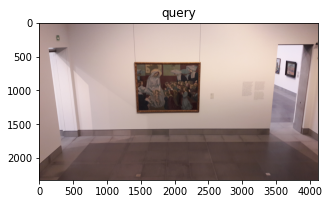

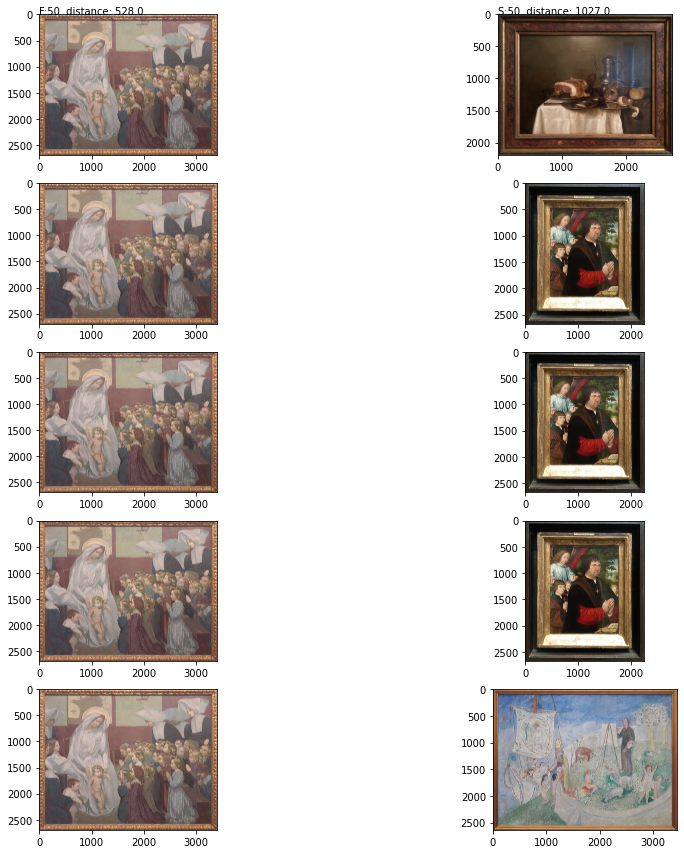

In [98]:
show_row(df,0)

In [8]:
db = pd.read_csv("/home/server/Documents/Github/computervisie-group8/src/data/keypoints.csv", ",")
# db['descriptors'] = db['descriptors'].apply(lambda x: convert_descriptors(x))
# db['keypoints'] = db['keypoints'].apply(lambda x: convert_keypoints(x))
#db['fvector'] = db['fvector'].apply(lambda x: convert_fvector(x))
db

/home/server/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_12__IMG_20190323_114238__01.png,"[[[274.0, 155.0], 31.0, 304.9578552246094, 0.0...","[[164, 224, 156, 155, 205, 157, 225, 136, 206,...",zaal_12,20190323_114238,1,"[1.5487326383590698, 3.1270999908447266, 0.0, ..."
1,1,Zaal_A__20190323_111857__01.png,"[[[288.0, 530.0], 31.0, 0.42852503061294556, 3...","[[240, 37, 74, 236, 61, 79, 66, 104, 5, 172, 2...",Zaal_A,0323_111857,1,"[1.8000414371490479, 1.1441154479980469, 2.295..."
2,2,zaal_15__IMG_20190323_115648__01.png,"[[[372.0, 510.0], 31.0, 146.66563415527344, 0....","[[165, 227, 45, 41, 172, 15, 199, 185, 66, 124...",zaal_15,20190323_115648,1,"[0.0, 0.0, 0.42124831676483154, 0.0, 2.2845273..."
3,3,zaal_11__IMG_20190323_114030__01.png,"[[[221.0, 41.0], 31.0, 257.9009094238281, 0.00...","[[57, 33, 112, 65, 119, 27, 250, 89, 105, 160,...",zaal_11,20190323_114030,1,"[2.528398036956787, 1.7421743869781494, 0.0, 0..."
4,4,zaal_15__IMG_20190323_120008__01.png,"[[[634.0, 432.0], 31.0, 178.6969757080078, 0.0...","[[66, 32, 134, 141, 76, 131, 168, 73, 190, 176...",zaal_15,20190323_120008,1,"[0.0, 3.387141227722168, 0.0, 0.0, 0.704207062..."
...,...,...,...,...,...,...,...,...
796,796,Zaal_K__20190323_122032__01.png,"[[[321.0, 327.0], 31.0, 291.553466796875, 4.64...","[[130, 148, 39, 155, 213, 247, 184, 103, 31, 2...",Zaal_K,0323_122032,1,"[0.0, 2.036345958709717, 1.0077383518218994, 0..."
797,797,zaal_19__IMG_20190323_121118__01.png,"[[[209.0, 565.0], 31.0, 90.82535552978516, 7.1...","[[213, 140, 135, 31, 155, 98, 6, 175, 118, 243...",zaal_19,20190323_121118,1,"[2.7316460609436035, 3.4137418270111084, 0.0, ..."
798,798,zaal_S__IMG_20190323_122759__01.png,"[[[213.0, 237.0], 31.0, 241.41717529296875, 1....","[[112, 89, 39, 37, 36, 78, 101, 48, 225, 218, ...",zaal_S,20190323_122759,1,"[0.7798616290092468, 2.2594056129455566, 0.179..."
799,799,Zaal_I__20190323_121200__01.png,"[[[203.0, 284.0], 31.0, 140.62030029296875, 0....","[[121, 1, 35, 237, 4, 78, 71, 49, 97, 128, 238...",Zaal_I,0323_121200,1,"[0.5342573523521423, 2.423213243484497, 0.9242..."


In [94]:
db['fvector'].head()

0    [[0.025319321], [0.19909637], [1.0211221], [1....
1    [[0.0], [0.2957968], [0.75874186], [1.9020355]...
2    [[0.05815658], [0.13274843], [1.0250067], [2.2...
3    [[0.033386417], [0.066825934], [1.0996912], [2...
4    [[0.01642335], [0.20404491], [0.7372967], [1.6...
Name: fvector, dtype: object

In [100]:
from scipy.spatial import distance



#similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in db['fvector'] ]
similar_idx_cosine = [ distance.euclidean(vectors, feat) for feat in db['fvector'] ]

In [101]:
idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[1:6]

In [102]:
#print(idx_closest)
for name in db.iloc[idx_closest].id:
    print(name)

zaal_19__IMG_20190323_121537__06.png
zaal_19__IMG_20190323_121537__07.png
zaal_19__IMG_20190323_121523__03.png
zaal_19__IMG_20190323_121447__04.png
zaal_19__IMG_20190323_121622__05.png


In [120]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt

2022-05-17 15:40:57.906378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

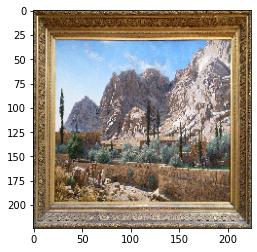

In [121]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()


def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [122]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [124]:
import pickle

images_path = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
image_extensions = ['.jpg', '.png', '.jpeg']

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print(f"{len(images)} images to analyze")

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print(f"Analyzing image {i} / {len(images)}...")
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0] # (1,4096)
    features.append(feat)

with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "wb") as fp:
  pickle.dump(features, fp)

print('Finished extracting features for %d images' % len(images))

801 images to analyze
Analyzing image 0 / 801...
Analyzing image 500 / 801...
Finished extracting features for 801 images


In [140]:
with open("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/features_similar_images.txt", "rb") as fp:   # Unpickling
  features = pickle.load(fp)

In [126]:
# from sklearn.decomposition import PCA
# features = np.array(features)

# pca = PCA()
# data_reduced = pca.fit_transform(features)

# pca = PCA(n_components=650)
# pca.fit(features)

# pca_features = pca.transform(features)

14
613
187
314
520
333


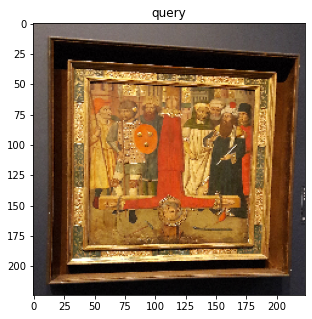

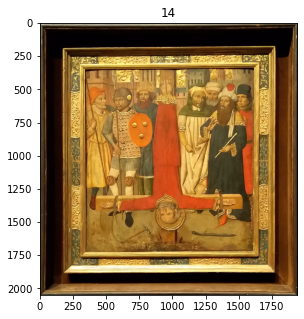

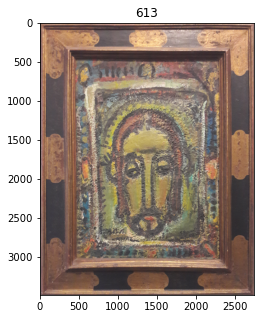

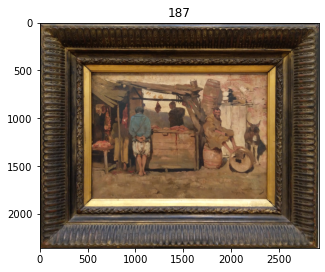

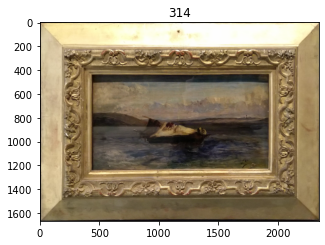

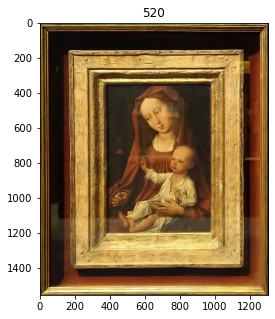

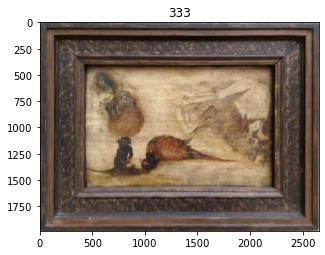

In [179]:
# grab a random query image


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");





vectors = feat_extractor.predict(x)[0] # (1,4096)Ò

# pca_features = pca.transform(feat)


similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in features ]

idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

# for name in db.iloc[idx_closest].id:
#     print(name)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

for i in idx_closest:
    print(i)
    img = image.load_img(images[i])
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(str(i))


In [26]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class CustomResNet():
    def __init__(self):
        self.pretrained_model = VGG16(weights='imagenet', include_top=True)
        self.model = Model(inputs=self.pretrained_model.input, outputs=self.pretrained_model.get_layer("fc2").output)
    
    def get_feature_vector(self, img_path):
        # Reference

        img, x = self.load_image(img_path);
        feat = self.model.predict(x)[0]

        return feat


    def cosine_match(self,img,df):
        img_array = self.preprocess_convert(img)
        vectors = self.model.predict(img_array)[0]

        similar_idx_cosine = [ distance.cosine(vectors, feat) for feat in df["fvector"]]
        idx_closest = sorted(range(len(similar_idx_cosine)), key=lambda k: similar_idx_cosine[k])[0:6]

        for i in idx_closest:
            print(i)
        
        return idx_closest

    def load_image(self, path):
        img = image.load_img(path, target_size=self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x

    def preprocess_convert(self, img):
        img = image.smart_resize(img, self.model.input_shape[1:3])
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return x        
        

In [174]:

import json

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)


featureMatcher = CustomResNet()
result = []


for file in directory_list:
    filename = os.fsdecode(file)
    img_path = DIRECTORY + "/" + filename
    print(img_path)

    # vector = featureMatcher.get_feature_vector(img_path)
    # print(vector)

    result.append({
        'id':filename,
        'fvector': json.dumps(featureMatcher.get_feature_vector(img_path).tolist())
    })

/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121622__09.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122944__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__04.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_19__IMG_20190323_121523__10.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_S__IMG_20190323_122748__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_15__IMG_20190323_115551__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_9__IMG_20190323_113745__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/Zaal_A__20190323_111313__01.png
/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_18__IMG_20190323_120719__01.png


In [175]:
df = pd.DataFrame(result)
df.head()

,id,fvector
0,zaal_19__IMG_20190323_121622__09.png,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,zaal_S__IMG_20190323_122944__04.png,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,zaal_19__IMG_20190323_121523__04.png,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,zaal_19__IMG_20190323_121523__10.png,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,zaal_S__IMG_20190323_122748__01.png,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [4]:
df = pd.read_csv("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/data/keypoints.csv")
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[0.35244137048721313, 0.14393076300621033, 0.0..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[3.1343345642089844, 3.21919322013855, 0.0, 0...."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[7.578836917877197, 3.3183648586273193, 0.3332..."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[0.0, 0.0, 0.0, 0.0, 4.049309253692627, 0.0, 0..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[1.7430344820022583, 1.0830790996551514, 0.254..."


In [10]:
def convert_fvector(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float64)
    return descriptors


df['fvector'] = df['fvector'].apply(lambda x: convert_fvector(x))    

In [11]:
df.head()

,Unnamed: 0,id,keypoints,descriptors,room,photo,painting_number,fvector
0,0,zaal_19__IMG_20190323_121622__09.png,"[[[755.0, 95.0], 31.0, 279.59832763671875, 0.0...","[[109, 129, 0, 203, 245, 189, 106, 186, 79, 81...",zaal_19,20190323_121622,9,"[[0.352441370487213], [0.14393076300621002], [..."
1,1,zaal_S__IMG_20190323_122944__04.png,"[[[754.0, 311.0], 31.0, 165.23532104492188, 0....","[[169, 250, 63, 26, 105, 95, 19, 228, 249, 95,...",zaal_S,20190323_122944,4,"[[3.134334564208984], [3.21919322013855], [0.0..."
2,2,zaal_19__IMG_20190323_121523__04.png,"[[[72.0, 720.0], 31.0, 313.84197998046875, 0.0...","[[168, 189, 121, 97, 244, 205, 113, 87, 115, 4...",zaal_19,20190323_121523,4,"[[7.578836917877197], [3.318364858627319], [0...."
3,3,zaal_19__IMG_20190323_121523__10.png,"[[[768.0, 31.0], 31.0, 357.64996337890625, 0.0...","[[185, 91, 110, 237, 4, 14, 231, 117, 84, 76, ...",zaal_19,20190323_121523,10,"[[0.0], [0.0], [0.0], [0.0], [4.04930925369262..."
4,4,zaal_S__IMG_20190323_122748__01.png,"[[[221.0, 395.0], 31.0, 46.401771545410156, 0....","[[42, 190, 102, 152, 255, 177, 184, 199, 159, ...",zaal_S,20190323_122748,1,"[[1.743034482002258], [1.083079099655151], [0...."


In [12]:
# img, x = load_image("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");


def preprocess_convert(img):
    img = image.smart_resize(img, featureMatcher.model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x        
        

featureMatcher = CustomResNet()

img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

#preprocess_convert(img)

featureMatcher.cosine_match(img,df)

14
733
187
613
726
322


261
344
707
7
720
674


Text(0.5, 1.0, 'result')

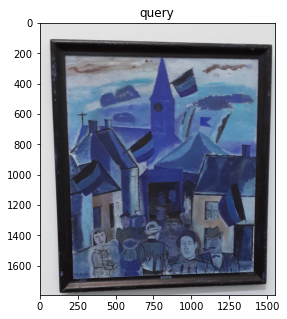

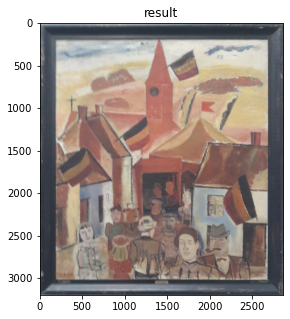

In [29]:

DIRECTORY = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database"
directory_list = os.listdir(DIRECTORY)



#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/zaal_19__IMG_20190323_121148__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_1__IMG_20190323_111717__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/zaal_V__IMG_20190323_121823__01.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");


img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_110345.jpg");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/Screenshot 2022-04-20 at 21.23.44.png");
#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg");

#img = cv2.imread("/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/test_images/20190203_112058.jpg")

featureMatcher = CustomResNet()
sim_indexes = featureMatcher.cosine_match(img,df)

plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query")

img_path = os.path.join(DIRECTORY, str(df.iloc[sim_indexes[0]].id))
img = image.load_img(img_path)


plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("result")